# 04 - Modeling

Now that we have a cleaned and optimized dataset to work with, we can start creating our models. We will be using the following models: Logistic Regression, Random Forest, and XGBoost.

## Imports and Loading Data

In [8]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load Data
df_full = pd.read_csv('/Users/zulykathlucero/Desktop/predicting-employee-attrition/data/processed/features_full.csv')
df_top = pd.read_csv('/Users/zulykathlucero/Desktop/predicting-employee-attrition/data/processed/features_top20.csv')

## Splitting Data into training and testing sets

We will be splitting each dataset into training and testing sets using a 70/30 split. This will ensure that we have enough data to train an accurate model and enough data to evaluate its accuracy. 

In [9]:
# Define Target
target = 'Attrition'

# Separate target from full dataset
X_full = df_full.drop(columns=target)
y_full = df_full[target]

# Separate target from filtered dataset
X_top = df_top.drop(columns=target)
y_top = df_top[target]

# 70/30 Split on both
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.3, random_state=42, stratify=y_full)
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y_top, test_size=0.3, random_state=42, stratify=y_top)

## Train Models

Now we can begin training the Logistic Regression and Random Forest models. We will train each model on both the full dataset and the dataset with filtered features. In order to minimize the chance of overfitting, we will be using cross validation. I will also be printing out some evaluation metrics. Using the default solver caused convergence warnings in the logistic regression, but using 'liblinear' fixed the issue.

In [10]:
# Logistic Regression on Full Dataset
lr_full = LogisticRegression(solver='liblinear', max_iter=5000, random_state=42) # Use liblinear solver to fix convergence warnings
lr_full.fit(X_train_full, y_train_full)
y_pred_lr_full = lr_full.predict(X_test_full)
y_proba_lr_full = lr_full.predict_proba(X_test_full)[:, 1]

# Evaluation Metrics
print("Logistic Regression on Full Dataset")
print("Accuracy:", accuracy_score(y_test_full, y_pred_lr_full))
print("Recall:", recall_score(y_test_full, y_pred_lr_full))
print("F1 Score:", f1_score(y_test_full, y_pred_lr_full))
print("ROC AUC:", roc_auc_score(y_test_full, y_proba_lr_full))
print(classification_report(y_test_full, y_pred_lr_full))

# Cross Validation
cv_f1 = cross_val_score(lr_full, X_full, y_full, cv=5, scoring='f1')
cv_recall = cross_val_score(lr_full, X_full, y_full, cv=5, scoring='recall')
cv_auc = cross_val_score(lr_full, X_full, y_full, cv=5, scoring='roc_auc')
print("CV F1 Mean:", cv_f1.mean())
print("CV Recall Mean:", cv_recall.mean())
print("CV ROC AUC Mean:", cv_auc.mean())

Logistic Regression on Full Dataset
Accuracy: 0.8866213151927438
Recall: 0.4084507042253521
F1 Score: 0.5370370370370371
ROC AUC: 0.806395127521888
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       370
           1       0.78      0.41      0.54        71

    accuracy                           0.89       441
   macro avg       0.84      0.69      0.74       441
weighted avg       0.88      0.89      0.87       441

CV F1 Mean: 0.528508144469885
CV Recall Mean: 0.4050531914893617
CV ROC AUC Mean: 0.84107491039916


In [11]:
# Logistic Regression on Filtered Dataset
lr_filter = LogisticRegression(solver='liblinear', max_iter=5000, random_state=42) # Use liblinear solver to fix convergence warnings
lr_filter.fit(X_train_top, y_train_top)
y_pred_lr_filter = lr_filter.predict(X_test_top)
y_proba_lr_filter = lr_filter.predict_proba(X_test_top)[:, 1]

# Evaluation Metrics
print("Logistic Regression on Filtered Dataset")
print("Accuracy:", accuracy_score(y_test_top, y_pred_lr_filter))
print("Recall:", recall_score(y_test_top, y_pred_lr_filter))
print("F1 Score:", f1_score(y_test_top, y_pred_lr_filter))
print("ROC AUC:", roc_auc_score(y_test_top, y_proba_lr_filter))
print(classification_report(y_test_top, y_pred_lr_filter))

# Cross Validation
cv_f1 = cross_val_score(lr_filter, X_top, y_top, cv=5, scoring='f1')
cv_recall = cross_val_score(lr_filter, X_top, y_top, cv=5, scoring='recall')
cv_auc = cross_val_score(lr_filter, X_top, y_top, cv=5, scoring='roc_auc')
print("CV F1 Mean:", cv_f1.mean())
print("CV Recall Mean:", cv_recall.mean())
print("CV ROC AUC Mean:", cv_auc.mean())

Logistic Regression on Filtered Dataset
Accuracy: 0.8503401360544217
Recall: 0.323943661971831
F1 Score: 0.4107142857142857
ROC AUC: 0.7825656642558051
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       370
           1       0.56      0.32      0.41        71

    accuracy                           0.85       441
   macro avg       0.72      0.64      0.66       441
weighted avg       0.83      0.85      0.83       441

CV F1 Mean: 0.36882297160409383
CV Recall Mean: 0.25336879432624115
CV ROC AUC Mean: 0.8011890480262369


In [12]:
# Random Forest on Full Dataset
rf_full = RandomForestClassifier(n_estimators=100, random_state=42)
rf_full.fit(X_train_full, y_train_full)
y_pred_rf_full = rf_full.predict(X_test_full)
y_proba_rf_full = rf_full.predict_proba(X_test_full)[:, 1]

# Evaluation Metrics
print("Random Forest on Full Dataset")
print("Accuracy:", accuracy_score(y_test_full, y_pred_rf_full))
print("Recall:", recall_score(y_test_full, y_pred_rf_full))
print("F1 Score:", f1_score(y_test_full, y_pred_rf_full))
print("ROC AUC:", roc_auc_score(y_test_full, y_proba_rf_full))
print(classification_report(y_test_full, y_pred_rf_full))

# Cross Validation
cv_f1 = cross_val_score(rf_full, X_full, y_full, cv=5, scoring='f1')
cv_recall = cross_val_score(rf_full, X_full, y_full, cv=5, scoring='recall')
cv_auc = cross_val_score(rf_full, X_full, y_full, cv=5, scoring='roc_auc')
print("CV F1 Mean:", cv_f1.mean())
print("CV Recall Mean:", cv_recall.mean())
print("CV ROC AUC Mean:", cv_auc.mean())

Random Forest on Full Dataset
Accuracy: 0.8344671201814059
Recall: 0.14084507042253522
F1 Score: 0.21505376344086022
ROC AUC: 0.7517320137038447
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       370
           1       0.45      0.14      0.22        71

    accuracy                           0.83       441
   macro avg       0.65      0.55      0.56       441
weighted avg       0.79      0.83      0.80       441

CV F1 Mean: 0.28882727924157564
CV Recall Mean: 0.17712765957446808
CV ROC AUC Mean: 0.7915552827786871


In [13]:
# Random Forest on Filtered Dataset
rf_filter = RandomForestClassifier(n_estimators=100, random_state=42)
rf_filter.fit(X_train_top, y_train_top)
y_pred_rf_filter = rf_filter.predict(X_test_top)
y_proba_rf_filter = rf_filter.predict_proba(X_test_top)[:, 1]

# Evaluation Metrics
print("Random Forest on Filtered Dataset")
print("Accuracy:", accuracy_score(y_test_top, y_pred_rf_filter))
print("Recall:", recall_score(y_test_top, y_pred_rf_filter))
print("F1 Score:", f1_score(y_test_top, y_pred_rf_filter))
print("ROC AUC:", roc_auc_score(y_test_top, y_proba_rf_filter))
print(classification_report(y_test_top, y_pred_rf_filter))

# Cross Validation
cv_f1 = cross_val_score(rf_filter, X_top, y_top, cv=5, scoring='f1')
cv_recall = cross_val_score(rf_filter, X_top, y_top, cv=5, scoring='recall')
cv_auc = cross_val_score(rf_filter, X_top, y_top, cv=5, scoring='roc_auc')
print("CV F1 Mean:", cv_f1.mean())
print("CV Recall Mean:", cv_recall.mean())
print("CV ROC AUC Mean:", cv_auc.mean())

Random Forest on Filtered Dataset
Accuracy: 0.8163265306122449
Recall: 0.1267605633802817
F1 Score: 0.18181818181818182
ROC AUC: 0.7322801674914351
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       370
           1       0.32      0.13      0.18        71

    accuracy                           0.82       441
   macro avg       0.59      0.54      0.54       441
weighted avg       0.76      0.82      0.78       441

CV F1 Mean: 0.3392483660130719
CV Recall Mean: 0.23634751773049648
CV ROC AUC Mean: 0.7689553209114225


## Compare Models

To compare the models, I will be using the cross-validated F1, Recall, and ROC AUC values of each. These evaluation metrics were chosen because of the imbalance in the target variable.

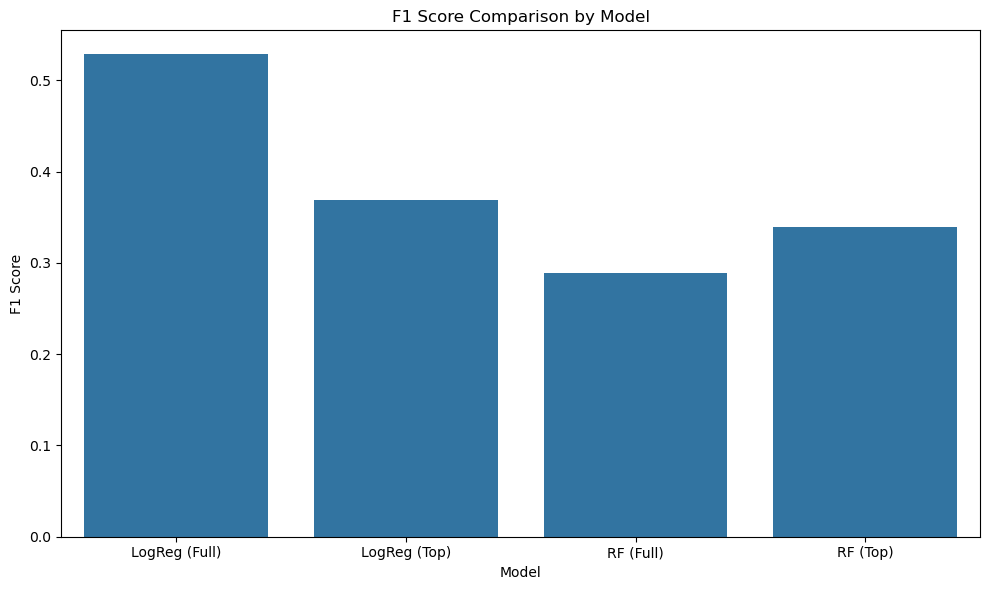

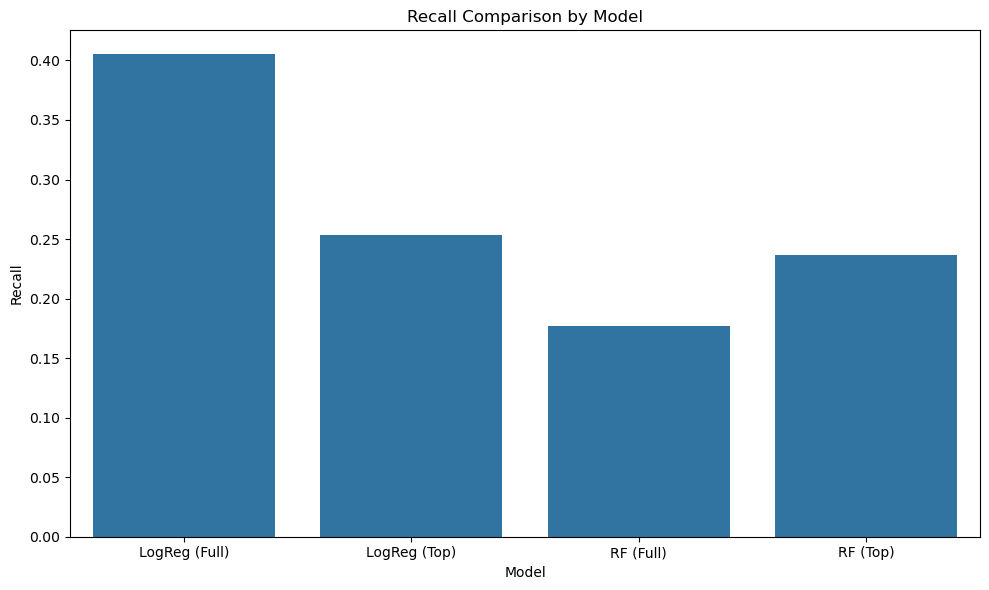

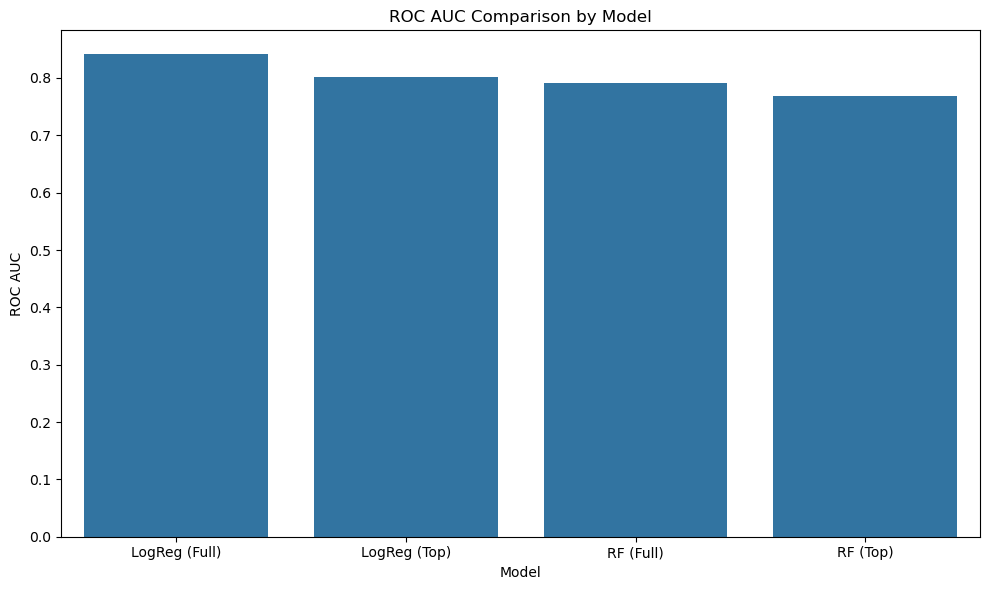

In [14]:
models = ['LogReg (Full)', 'LogReg (Top)', 'RF (Full)', 'RF (Top)']
f1_scores = [0.528508144469885, 0.36882297160409383, 0.28882727924157564, 0.3392483660130719]
recall_scores = [0.4050531914893617, 0.25336879432624115, 0.17712765957446808, 0.23634751773049648]
AUC_scores = [0.84107491039916, 0.8011890480262369, 0.7915552827786871, 0.7689553209114225]

# Visualize F1 Comparison
plt.figure(figsize=(10,6))
sns.barplot(x=models, y=f1_scores)
plt.title("F1 Score Comparison by Model")
plt.ylabel("F1 Score")
plt.xlabel("Model")
plt.tight_layout()
plt.savefig("/Users/zulykathlucero/Desktop/predicting-employee-attrition/reports/figures/f1_score_comparison.png")
plt.show()

# Visualize Recall Comparison
plt.figure(figsize=(10,6))
sns.barplot(x=models, y=recall_scores)
plt.title("Recall Comparison by Model")
plt.ylabel("Recall")
plt.xlabel("Model")
plt.tight_layout()
plt.savefig("/Users/zulykathlucero/Desktop/predicting-employee-attrition/reports/figures/recall_comparison.png")
plt.show()

# Visualize AUC Comparison
plt.figure(figsize=(10,6))
sns.barplot(x=models, y=AUC_scores)
plt.title("ROC AUC Comparison by Model")
plt.ylabel("ROC AUC")
plt.xlabel("Model")
plt.tight_layout()
plt.savefig("/Users/zulykathlucero/Desktop/predicting-employee-attrition/reports/figures/ROC_AUC_comparison.png")
plt.show()

## Observations

From the visualizations, we can see that the logistic regression on the full dataset performed the best. This model had the highest cross-validated F1 score, recall, and ROC AUC. The logistic regression had the next highest scores for all three metrics. As for the Random Forest models, the version trained on the full dataset had a lower F1 score and lower recall but slightly greater ROC AUC than the version trained on the filtered dataset.